# Milestone 1

# 1 - Perkenalan

Nama : Muhamad Natual Hisak

Batch : FTDS-016-RMT

Dataset 1 : credit_card_default<br> (SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 32000)

Objective 1 : Prediksi default_payment_next_month 

# 2 - Import Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
import joblib

# 3 - Data Loading

In [124]:
warnings.filterwarnings("ignore")

Load dataset

In [125]:
df = pd.read_csv(r'C:\Users\Omen\Desktop\Hacktiv8\P1\Milestone 1\h8dsft_P1M1_Muhamad_Natual_Hisak.csv')


In [126]:
pd.set_option("display.max.columns", None)

In [127]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,2,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
3,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
4,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0


In [128]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,5280.0,5000.0,5000.0,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2961,110000.0,2,2,2,24.0,-1.0,-1.0,-1.0,-1.0,0,0,1362.0,1352.0,1867.0,36986.0,40053.0,41196.0,1352.0,1867.0,36986.0,5000.0,3000.0,23000.0,0
2962,160000.0,2,1,2,32.0,-1.0,-1.0,-1.0,-1.0,-1,-1,9441.0,5714.0,5030.0,3181.0,4998.0,1250.0,5726.0,5037.0,3182.0,5000.0,1252.0,749.0,0
2963,210000.0,2,1,1,38.0,0.0,0.0,-1.0,-1.0,0,0,8420.0,8106.0,4168.0,23067.0,19972.0,45864.0,3000.0,4521.0,24000.0,10000.0,30000.0,6432.0,0
2964,360000.0,2,2,1,37.0,-1.0,-1.0,0.0,-1.0,-1,-1,10000.0,17444.0,17165.0,10000.0,10000.0,10000.0,17444.0,10035.0,10000.0,10000.0,10000.0,0.0,0


Copy data ke variabel baru

In [129]:
dfc = df.copy()

# 4 - Exploratory Data Analysis (EDA)

Lihat missing value tiap kolom dan data type

In [130]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Tidak ada missing value dan semua kolom numerikal

Cek value count kolom target

In [131]:
df['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

Cek korelasi

In [132]:
df.corr("spearman")

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
limit_balance,1.000000,0.061210,-0.253357,-0.119561,0.184518,-0.243146,-0.322271,-0.312576,-0.282085,-0.266779,-0.246150,0.090185,0.087058,0.096425,0.107477,0.112764,0.118347,0.286469,0.278651,0.282385,0.288044,0.299103,0.313723,-0.173945
sex,0.061210,1.000000,-0.004018,-0.012089,-0.138173,-0.068582,-0.103479,-0.099559,-0.071169,-0.052851,-0.044285,-0.069827,-0.067161,-0.047877,-0.030803,-0.024946,-0.028069,-0.019805,0.006786,0.017807,0.006860,0.005315,0.022989,-0.021765
education_level,-0.253357,-0.004018,1.000000,-0.154977,0.177698,0.106659,0.139402,0.140373,0.131784,0.123111,0.105467,0.073044,0.072080,0.062308,0.047236,0.035089,0.035988,-0.039012,-0.054404,-0.043917,-0.039684,-0.051381,-0.066543,0.060871
marital_status,-0.119561,-0.012089,-0.154977,1.000000,-0.448085,-0.002957,0.061185,0.048316,0.052755,0.055952,0.062868,0.011392,0.012395,0.009046,0.010169,0.014349,0.012940,-0.008213,-0.013855,-0.000542,0.004927,-0.004731,0.012245,-0.026406
age,0.184518,-0.138173,0.177698,-0.448085,1.000000,-0.035314,-0.097816,-0.087288,-0.094178,-0.101923,-0.080080,0.018781,0.016657,0.006416,-0.009479,0.012745,0.020383,0.041200,0.019718,0.008221,0.046807,0.044513,0.021471,0.009883
pay_0,-0.243146,-0.068582,0.106659,-0.002957,-0.035314,1.000000,0.604041,0.513675,0.485532,0.462039,0.441509,0.287572,0.294629,0.280028,0.279062,0.265537,0.263049,-0.119752,-0.089490,-0.072489,-0.049151,-0.031649,-0.072462,0.326925
pay_2,-0.322271,-0.103479,0.139402,0.061185,-0.097816,0.604041,1.000000,0.795529,0.687891,0.648177,0.616631,0.560232,0.531168,0.495278,0.484681,0.457926,0.441152,0.012918,0.073159,0.090562,0.092032,0.096659,0.050879,0.246067
pay_3,-0.312576,-0.099559,0.140373,0.048316,-0.087288,0.513675,0.795529,1.000000,0.766954,0.699569,0.647212,0.515620,0.579671,0.537192,0.522243,0.497652,0.467658,0.209755,0.015870,0.108722,0.122636,0.107359,0.074539,0.227406
pay_4,-0.282085,-0.071169,0.131784,0.052755,-0.094178,0.485532,0.687891,0.766954,1.000000,0.816483,0.713362,0.495276,0.533756,0.598335,0.581214,0.554219,0.523361,0.170441,0.236476,0.065366,0.157103,0.154337,0.119362,0.210646
pay_5,-0.266779,-0.052851,0.123111,0.055952,-0.101923,0.462039,0.648177,0.699569,0.816483,1.000000,0.809355,0.476296,0.510179,0.563600,0.629037,0.602556,0.555000,0.142320,0.202617,0.247853,0.107817,0.162901,0.152184,0.210866


Korelasi terhadap kolom target terbesar ada pada kolom pay_0, tetapi kolom tersebut juga berkorelasi dengan kolom pay yang lainnya (pay_2 sampai pay_6). Begitu juga dengan kolom pay_amt dan bill_amt.

Cek skew tiap kolom

In [133]:
df.skew()

limit_balance                  1.000442
sex                           -0.441625
education_level                0.899875
marital_status                -0.020106
age                            0.772887
pay_0                          0.926790
pay_2                          0.861762
pay_3                          0.931460
pay_4                          1.101504
pay_5                          1.060173
pay_6                          0.978760
bill_amt_1                     2.484598
bill_amt_2                     2.458349
bill_amt_3                     2.569937
bill_amt_4                     2.448175
bill_amt_5                     2.400343
bill_amt_6                     2.432406
pay_amt_1                     11.877647
pay_amt_2                     29.404261
pay_amt_3                      8.044639
pay_amt_4                      8.451541
pay_amt_5                     11.468890
pay_amt_6                      9.760184
default_payment_next_month     1.394199
dtype: float64

lihat histogram data target

Text(0.5, 1.0, 'default payment next month')

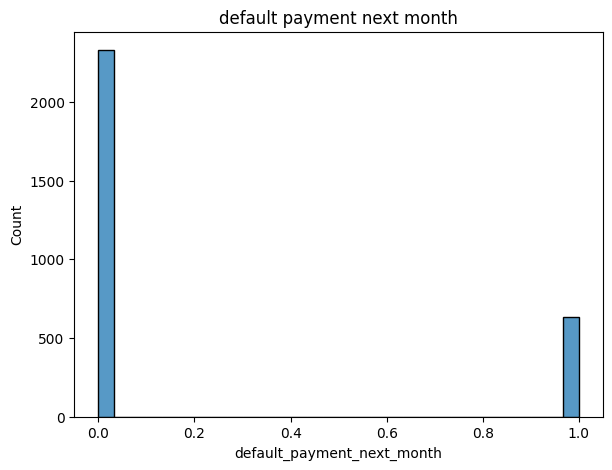

In [134]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['default_payment_next_month'], bins=30)
plt.title('default payment next month')

sebagian besar pengguna tidak melakukan default payment di bulan selanjutnya

# 5 - Data Preprocessing

Dapatkan data untuk model inference

In [135]:
data_inf = df.sample(10, random_state=1)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1765,30000.0,1,2,1,35.0,0.0,0.0,0.0,2.0,0,0,8348.0,9678.0,12702.0,12206.0,12701.0,13839.0,1476.0,3500.0,0.0,1000.0,1500.0,0.0,1
525,100000.0,1,1,2,26.0,0.0,0.0,0.0,0.0,0,0,91189.0,93383.0,96301.0,90858.0,92724.0,96030.0,3500.0,4300.0,4400.0,4000.0,4700.0,5000.0,0
1456,260000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0,0,156882.0,160246.0,159988.0,158114.0,158762.0,159108.0,10000.0,8000.0,6000.0,7000.0,7000.0,6000.0,0
929,140000.0,2,5,2,25.0,0.0,0.0,0.0,0.0,0,0,91485.0,78704.0,79449.0,45514.0,42155.0,42812.0,3009.0,3411.0,1523.0,1352.0,1526.0,1505.0,0
854,300000.0,2,2,1,46.0,1.0,-2.0,-1.0,0.0,-1,-1,0.0,0.0,194.0,1375.0,13970.0,1672.0,0.0,194.0,1181.0,14039.0,1679.0,4156.0,0
1178,100000.0,2,3,3,43.0,0.0,0.0,0.0,0.0,0,0,62300.0,63759.0,64448.0,38500.0,39469.0,40653.0,2464.0,1902.0,1378.0,1589.0,2000.0,1506.0,0
2828,180000.0,2,2,2,28.0,-1.0,-1.0,-1.0,-1.0,-1,-1,3840.0,18588.0,1557.0,2540.0,3058.0,16030.0,18588.0,1562.0,2540.0,3058.0,16030.0,330.0,0
1442,150000.0,2,1,2,28.0,0.0,0.0,0.0,0.0,0,0,82559.0,84681.0,87308.0,89316.0,91458.0,89063.0,3500.0,4000.0,3500.0,3500.0,3500.0,3500.0,0
1131,20000.0,2,2,2,30.0,1.0,2.0,0.0,0.0,0,0,16560.0,15997.0,17336.0,18345.0,18643.0,19094.0,0.0,1600.0,1602.0,900.0,900.0,636.0,0
2583,80000.0,1,2,2,30.0,0.0,0.0,2.0,-1.0,-1,-2,53627.0,64913.0,19476.0,61302.0,0.0,0.0,33000.0,56.0,62877.0,0.0,41150.0,81000.0,0


Hapus data yang dijadikan inference set dari data yang akan digunakan sebagai model train-test

In [136]:
data_train_test = df.drop(data_inf.index)
data_train_test.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,2,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
3,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
4,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0


Reset index

In [137]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Split X dan y (drop kolom feature yang saling berkorelasi)

In [138]:
X = data_train_test.drop(['default_payment_next_month','pay_2','pay_3','pay_4','pay_5','pay_6','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6'], axis=1)
y = data_train_test['default_payment_next_month']

Split data sebagai Train set dan Test set

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2364, 8)
Test Size  :  (591, 8)


## Feature Selection

Gunakan ANOVA untuk memilih 4 feature dengan korelasi tertinggi

In [140]:
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train,y_train)
selector.scores_

array([5.46202630e+01, 4.06071039e-01, 4.38660343e+00, 1.58959154e+00,
       3.67605465e-01, 3.34708571e+02, 1.21901029e-02, 9.05922376e+00])

Dapatkan 4 kolom feature dengan korelasi tertinggi

In [141]:
cols = selector.get_support(indices=True)
cols

array([0, 2, 5, 7], dtype=int64)

Kolom 1, 3, 6, dan 8 adalah kolom feature dengan korelasi tertinggi

In [142]:
X_train = X_train[['limit_balance','education_level','pay_0','pay_amt_1']]
X_test = X_test[['limit_balance','education_level','pay_0','pay_amt_1']]

Semua kolom numerikal jadi tidak perlu dilakukan encoding

Lakukan normalization

In [143]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_num_scaled = scaler.transform(X_train)
X_test_num_scaled = scaler.transform(X_test)
X_train_num_scaled

array([[0.2278481 , 0.66666667, 0.1       , 0.024315  ],
       [0.02531646, 0.33333333, 0.2       , 0.02026926],
       [0.17721519, 0.33333333, 0.2       , 0.00605037],
       ...,
       [0.32911392, 0.33333333, 0.2       , 0.00506731],
       [0.25316456, 0.5       , 0.3       , 0.00243231],
       [0.17721519, 0.33333333, 0.1       , 0.29859453]])

Jadikan Dataframe

In [144]:
X_train_final_df2 = pd.DataFrame(X_train_num_scaled)
X_train_final_df2

,0,1,2,3
0,0.227848,0.666667,0.1,0.024315
1,0.025316,0.333333,0.2,0.020269
2,0.177215,0.333333,0.2,0.006050
3,0.873418,0.166667,0.2,0.026350
4,0.088608,0.333333,0.2,0.016215
...,...,...,...,...
2359,0.075949,0.166667,0.2,0.005473
2360,0.240506,0.166667,0.2,0.008108
2361,0.329114,0.333333,0.2,0.005067
2362,0.253165,0.500000,0.3,0.002432


# 6 - Model Definition

Notes : 

1. Algoritma yang dipakai adalah `Logistic Regression`, `SVM`, `Decision Tree Classifier`,`Random Forest Classifier`, `KNN`, dan `Naive Bayes` .

2. Metrics yang akan dipakai adalah `Precision score`.

In [145]:
log_reg = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
nb_clf = GaussianNB()
knn_clf = KNeighborsClassifier()

# 7 - Model Training

Lakukan training

In [146]:
log_reg.fit(X_train_num_scaled,y_train)

LogisticRegression()

In [147]:
svm_clf.fit(X_train_num_scaled,y_train)

SVC()

In [148]:
dt_clf.fit(X_train_num_scaled,y_train)

DecisionTreeClassifier()

In [149]:
rf_clf.fit(X_train_num_scaled,y_train)

RandomForestClassifier()

In [150]:
nb_clf.fit(X_train_num_scaled,y_train)

GaussianNB()

In [151]:
knn_clf.fit(X_train_num_scaled,y_train)

KNeighborsClassifier()

# 8 - Model Evaluation

Predict dengan log_reg

In [152]:
# Predict Train-Set and Test-Set 

y_pred_train_log = log_reg.predict(X_train_num_scaled)
y_pred_test_log = log_reg.predict(X_test_num_scaled)

y_pred_train_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Predict dengan svm

In [153]:
# Predict Train-Set and Test-Set 

y_pred_train_svm = svm_clf.predict(X_train_num_scaled)
y_pred_test_svm = svm_clf.predict(X_test_num_scaled)

y_pred_train_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Predict dengan Decision Tree

In [154]:
# Predict Train-Set and Test-Set 

y_pred_train_dt = dt_clf.predict(X_train_num_scaled)
y_pred_test_dt = dt_clf.predict(X_test_num_scaled)

y_pred_train_dt

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

Predict dengan Random Forest

In [155]:
# Predict Train-Set and Test-Set 

y_pred_train_rf = rf_clf.predict(X_train_num_scaled)
y_pred_test_rf = rf_clf.predict(X_test_num_scaled)

y_pred_train_rf

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

Predict dengan Naive Bayes

In [156]:
# Predict Train-Set and Test-Set 

y_pred_train_nb = nb_clf.predict(X_train_num_scaled)
y_pred_test_nb = nb_clf.predict(X_test_num_scaled)

y_pred_train_nb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Predict dengan KNN

In [157]:
# Predict Train-Set and Test-Set 

y_pred_train_knn = knn_clf.predict(X_train_num_scaled)
y_pred_test_knn = knn_clf.predict(X_test_num_scaled)

y_pred_train_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Lihat metric hasil prediksi menggunakan logistic regression

accuracy score train :  0.8092216582064298
accuracy score test :  0.8155668358714044
precision score train :  0.7338709677419355
precision score test :  0.7105263157894737
recall score train :  0.1787819253438114
recall score test :  0.216


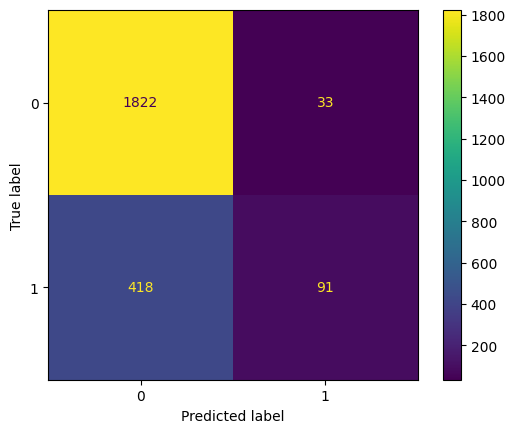

In [158]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_log))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_log))
print('precision score train : ',precision_score(y_train,y_pred_train_log))
print('precision score test : ',precision_score(y_test,y_pred_test_log))
print('recall score train : ',recall_score(y_train,y_pred_train_log))
print('recall score test : ',recall_score(y_test,y_pred_test_log))
cm = confusion_matrix(y_train, y_pred_train_log, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)

disp.plot()
plt.show()

Lihat metric hasil prediksi menggunakan SVM

accuracy score train :  0.8379864636209814
accuracy score test :  0.8257191201353637
precision score train :  0.7692307692307693
precision score test :  0.6774193548387096
recall score train :  0.35363457760314343
recall score test :  0.336


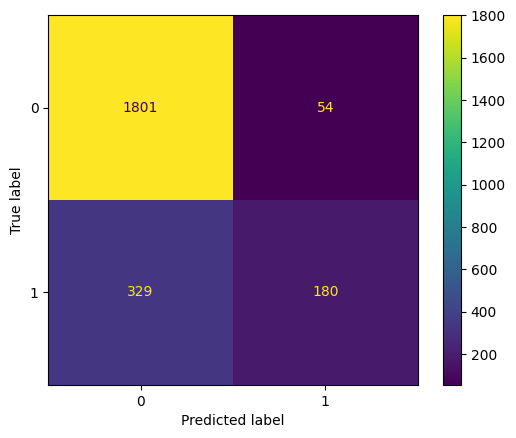

In [159]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_svm))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_svm))
print('precision score train : ',precision_score(y_train,y_pred_train_svm))
print('precision score test : ',precision_score(y_test,y_pred_test_svm))
print('recall score train : ',recall_score(y_train,y_pred_train_svm))
print('recall score test : ',recall_score(y_test,y_pred_test_svm))
cm = confusion_matrix(y_train, y_pred_train_svm, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_clf.classes_)

disp.plot()
plt.show()

Lihat metric hasil prediksi menggunakan Decision Tree Classifier

accuracy score train :  0.961082910321489
accuracy score test :  0.7411167512690355
precision score train :  0.977116704805492
precision score test :  0.37272727272727274
recall score train :  0.8388998035363457
recall score test :  0.328


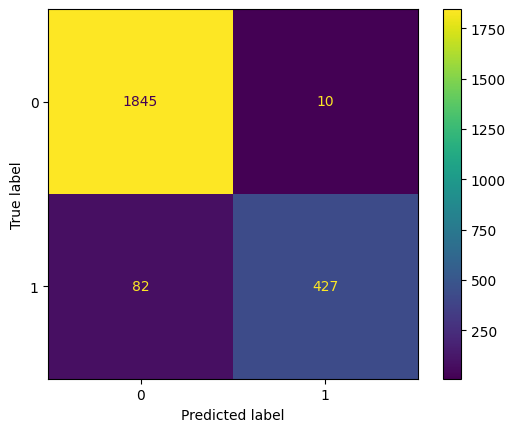

In [160]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_dt))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_dt))
print('precision score train : ',precision_score(y_train,y_pred_train_dt))
print('precision score test : ',precision_score(y_test,y_pred_test_dt))
print('recall score train : ',recall_score(y_train,y_pred_train_dt))
print('recall score test : ',recall_score(y_test,y_pred_test_dt))
cm = confusion_matrix(y_train, y_pred_train_dt, labels=dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_clf.classes_)

disp.plot()
plt.show()

Lihat metric hasil prediksi menggunakan Random Forest Classifier

accuracy score train :  0.961082910321489
accuracy score test :  0.8037225042301185
precision score train :  0.9562363238512035
precision score test :  0.5529411764705883
recall score train :  0.8585461689587426
recall score test :  0.376


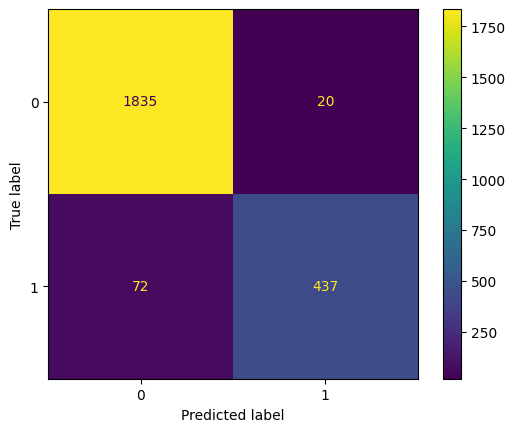

In [161]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_rf))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_rf))
print('precision score train : ',precision_score(y_train,y_pred_train_rf))
print('precision score test : ',precision_score(y_test,y_pred_test_rf))
print('recall score train : ',recall_score(y_train,y_pred_train_rf))
print('recall score test : ',recall_score(y_test,y_pred_test_rf))
cm = confusion_matrix(y_train, y_pred_train_rf, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_clf.classes_)

disp.plot()
plt.show()

Lihat metric hasil prediksi menggunakan Naive Bayes

accuracy score train :  0.8206429780033841
accuracy score test :  0.8223350253807107
precision score train :  0.6115485564304461
precision score test :  0.5961538461538461
recall score train :  0.4577603143418468
recall score test :  0.496


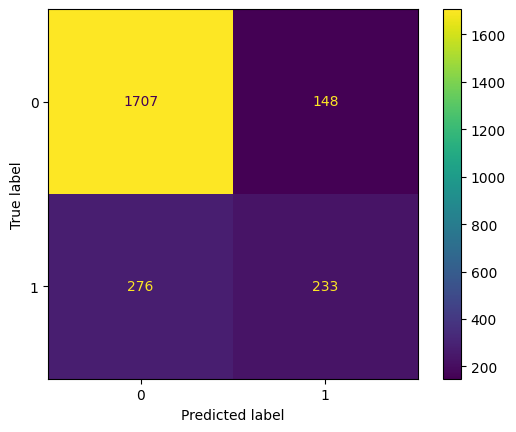

In [162]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_nb))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_nb))
print('precision score train : ',precision_score(y_train,y_pred_train_nb))
print('precision score test : ',precision_score(y_test,y_pred_test_nb))
print('recall score train : ',recall_score(y_train,y_pred_train_nb))
print('recall score test : ',recall_score(y_test,y_pred_test_nb))
cm = confusion_matrix(y_train, y_pred_train_nb, labels=nb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb_clf.classes_)

disp.plot()
plt.show()

Lihat metric hasil prediksi menggunakan KNN

accuracy score train :  0.8477157360406091
accuracy score test :  0.8020304568527918
precision score train :  0.7320872274143302
precision score test :  0.5487804878048781
recall score train :  0.46168958742632615
recall score test :  0.36


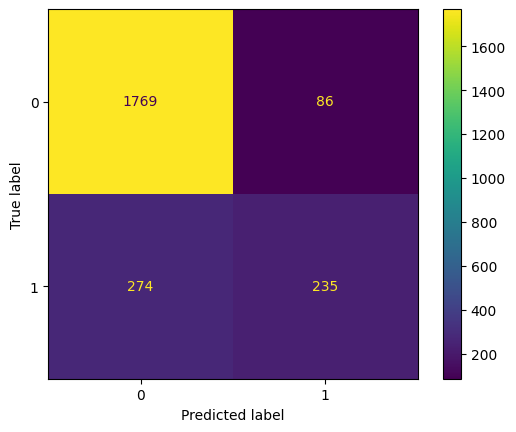

In [163]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_knn))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_knn))
print('precision score train : ',precision_score(y_train,y_pred_train_knn))
print('precision score test : ',precision_score(y_test,y_pred_test_knn))
print('recall score train : ',recall_score(y_train,y_pred_train_knn))
print('recall score test : ',recall_score(y_test,y_pred_test_knn))
cm = confusion_matrix(y_train, y_pred_train_knn, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_clf.classes_)

disp.plot()
plt.show()

Lakukan Cross Validation ke model log_reg

In [164]:
scores_log = cross_val_score(log_reg, X, y, cv=5, scoring='precision')
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores_log.mean(), scores_log.std()))
scores_log

Mean score of 0.00 with a standard deviation of 0.00


array([0., 0., 0., 0., 0.])

Lakukan Cross Validation ke model Decision Tree

In [165]:
scores_dt = cross_val_score(dt_clf, X, y, cv=5, scoring='precision')
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores_dt.mean(), scores_dt.std()))
scores_dt

Mean score of 0.36 with a standard deviation of 0.05


array([0.4       , 0.41964286, 0.37086093, 0.32954545, 0.28947368])

Lakukan Cross Validation ke model Random Forest

In [166]:
scores_rf = cross_val_score(rf_clf, X, y, cv=5, scoring='precision')
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))
scores_rf

Mean score of 0.64 with a standard deviation of 0.10


array([0.55128205, 0.77358491, 0.64583333, 0.4954955 , 0.71052632])

Lakukan Cross Validation ke model Naive Bayes

In [167]:
scores_nb = cross_val_score(nb_clf, X, y, cv=5, scoring='precision')
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores_nb.mean(), scores_nb.std()))
scores_nb

Mean score of 0.55 with a standard deviation of 0.26


array([0.27423823, 0.33333333, 0.66666667, 1.        , 0.5       ])

Lakukan Cross Validation ke model KNN

In [168]:
scores_knn = cross_val_score(knn_clf, X, y, cv=5, scoring='precision')
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores_knn.mean(), scores_knn.std()))
scores_knn

Mean score of 0.28 with a standard deviation of 0.06


array([0.34375   , 0.30985915, 0.32876712, 0.23529412, 0.2       ])

Bisa dilihat hasil cross_validation terbaik ada pada model Random Forest, maka model tersebut yang akan di tune

# 9 - Model Tuning

Gunakan grid search untuk dapatkan hyperparameter terbaik untuk log_reg

In [169]:
parameters = {
    'n_estimators' : range(0,100),
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' :range(2,12)
}
GridSearch = GridSearchCV(RandomForestClassifier(random_state=17), parameters, cv=5)

GridSearch = GridSearch.fit(X_train_num_scaled, y_train)

print("Best params:", GridSearch.best_params_)
print("Best cross validaton score", GridSearch.best_score_)


Best params: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 24}
Best cross validaton score 0.8392589672841939


Aplikasikan hyperparameter yang didapatkan ke model

In [170]:
rf_modt = RandomForestClassifier(criterion='gini', max_depth=6, n_estimators = 24, random_state = 17)
rf_modt = rf_modt.fit(X_train_num_scaled, y_train)
rf_modt

RandomForestClassifier(max_depth=6, n_estimators=24, random_state=17)

Train model

In [171]:
rf_modt.fit(X_train_num_scaled,y_train)

RandomForestClassifier(max_depth=6, n_estimators=24, random_state=17)

Predict dengan model yang sudah di tune

In [172]:
# Predict Train-Set and Test-Set 

y_pred_train_rft = rf_modt.predict(X_train_num_scaled)
y_pred_test_rft = rf_modt.predict(X_test_num_scaled)

y_pred_train_rft

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Lihat hasil metric nya

precision score train :  0.8059071729957806
precision score test :  0.6875


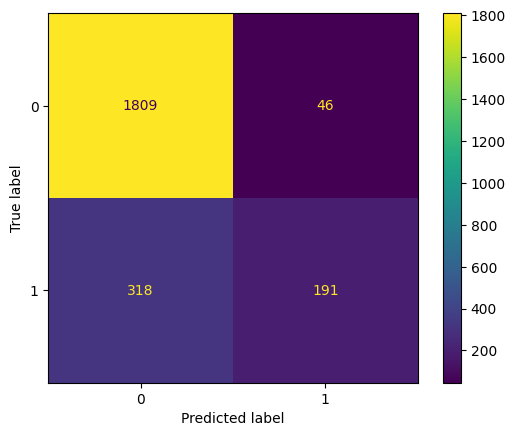

In [173]:
print('precision score train : ',precision_score(y_train,y_pred_train_rft))
print('precision score test : ',precision_score(y_test,y_pred_test_rft))
cm = confusion_matrix(y_train, y_pred_train_rft, labels=rf_modt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_modt.classes_)

disp.plot()
plt.show()


precision score train :  0.8059071729957806
precision score test :  0.6875

precision score train :  0.9623059866962306
precision score test :  0.5647058823529412

Nilai Precision train turun 16% tetapi pada test naik 12%. Model masih overfit

# 10 - Model Saving

In [174]:
with open('log_reg.pkl', 'wb') as file_1:
  joblib.dump(log_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('dt_clf.pkl', 'wb') as file_3:
  joblib.dump(dt_clf, file_3)

with open('rf_clf.pkl', 'wb') as file_4:
  joblib.dump(rf_clf, file_4)

with open('nb_clf.pkl', 'wb') as file_5:
  joblib.dump(nb_clf, file_5)

with open('knn_clf.pkl', 'wb') as file_6:
  joblib.dump(knn_clf, file_6)

with open('svm_clf.pkl', 'wb') as file_7:
  joblib.dump(svm_clf, file_7)

with open('rf_modt.pkl', 'wb') as file_8:
  joblib.dump(rf_modt, file_8)

# 11 - Model Inference

Load model

In [175]:
with open('log_reg.pkl', 'rb') as file_1:
  log_model = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('dt_clf.pkl', 'rb') as file_3:
  dt_mod = joblib.load(file_3)

with open('rf_modt.pkl', 'rb') as file_4:
  rf_modt = joblib.load(file_4)

with open('rf_clf.pkl', 'rb') as file_5:
  rf_mod = joblib.load(file_5)
  
with open('nb_clf.pkl', 'rb') as file_6:
  nb_mod = joblib.load(file_6)

with open('knn_clf.pkl', 'rb') as file_7:
  knn_mod = joblib.load(file_7)

with open('svm_clf.pkl', 'rb') as file_8:
  svm_mod = joblib.load(file_8)
  

Load data inference dan ambil featurenya saja

In [176]:
data_inf2 = data_inf[['limit_balance','education_level','pay_0','pay_amt_1']]
data_inf2

,limit_balance,education_level,pay_0,pay_amt_1
0,30000.0,2,0.0,1476.0
1,100000.0,1,0.0,3500.0
2,260000.0,1,0.0,10000.0
3,140000.0,5,0.0,3009.0
4,300000.0,2,1.0,0.0
5,100000.0,3,0.0,2464.0
6,180000.0,2,-1.0,18588.0
7,150000.0,1,0.0,3500.0
8,20000.0,2,1.0,0.0
9,80000.0,2,0.0,33000.0


Lakukan normalization

In [177]:
data_inf_scaled = model_scaler.transform(data_inf2)
data_inf_scaled

array([[0.02531646, 0.33333333, 0.2       , 0.00299174],
       [0.11392405, 0.16666667, 0.2       , 0.00709424],
       [0.3164557 , 0.16666667, 0.2       , 0.02026926],
       [0.16455696, 0.83333333, 0.2       , 0.00609902],
       [0.36708861, 0.33333333, 0.3       , 0.        ],
       [0.11392405, 0.5       , 0.2       , 0.00499434],
       [0.21518987, 0.33333333, 0.1       , 0.03767649],
       [0.17721519, 0.16666667, 0.2       , 0.00709424],
       [0.01265823, 0.33333333, 0.3       , 0.        ],
       [0.08860759, 0.33333333, 0.2       , 0.06688855]])

Predict dengan model-model yang sudah di load, lalu jadikan dataframe dengan nama kolom "predict (nama model)"

In [178]:
#log_model
y_pred_inf = log_model.predict(data_inf_scaled)
y_pred_inf_df_log = pd.DataFrame(y_pred_inf, columns=['Predict log_model'])
y_pred_inf_df_log.head()


,Predict log_model
0,0
1,0
2,0
3,0
4,0


In [179]:
#svm
y_pred_inf = svm_mod.predict(data_inf_scaled)
y_pred_inf_df_svm = pd.DataFrame(y_pred_inf, columns=['Predict svm_mod'])
y_pred_inf_df_svm.head()

,Predict svm_mod
0,0
1,0
2,0
3,0
4,0


In [180]:
#dt_mod
y_pred_inf = dt_mod.predict(data_inf_scaled)
y_pred_inf_df_dt = pd.DataFrame(y_pred_inf, columns=['Predict dt_mod'])
y_pred_inf_df_dt.head()

,Predict dt_mod
0,0
1,0
2,0
3,0
4,0


In [181]:
#rf
y_pred_inf = rf_mod.predict(data_inf_scaled)
y_pred_inf_df_rf = pd.DataFrame(y_pred_inf, columns=['Predict rf_mod'])
y_pred_inf_df_rf.head()

,Predict rf_mod
0,0
1,0
2,0
3,0
4,0


In [182]:
#nb
y_pred_inf = nb_mod.predict(data_inf_scaled)
y_pred_inf_df_nb = pd.DataFrame(y_pred_inf, columns=['Predict nb_mod'])
y_pred_inf_df_nb.head()

,Predict nb_mod
0,0
1,0
2,0
3,0
4,0


In [183]:
#knn
y_pred_inf = knn_mod.predict(data_inf_scaled)
y_pred_inf_df_knn = pd.DataFrame(y_pred_inf, columns=['Predict knn_mod'])
y_pred_inf_df_knn.head()

,Predict knn_mod
0,0
1,0
2,0
3,0
4,0


In [184]:
#log_model tuned
y_pred_inf = rf_modt.predict(data_inf_scaled)
y_pred_inf_df_rft = pd.DataFrame(y_pred_inf, columns=['Predict rf_modt'])
y_pred_inf_df_rft.head()

,Predict rf_modt
0,0
1,0
2,0
3,0
4,0


Concat semua dengan data_inf asli

In [185]:
pd.concat([data_inf, y_pred_inf_df_log, y_pred_inf_df_svm, y_pred_inf_df_dt, y_pred_inf_df_rf, y_pred_inf_df_nb, y_pred_inf_df_knn, y_pred_inf_df_rft], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Predict log_model,Predict svm_mod,Predict dt_mod,Predict rf_mod,Predict nb_mod,Predict knn_mod,Predict rf_modt
0,30000.0,1,2,1,35.0,0.0,0.0,0.0,2.0,0,0,8348.0,9678.0,12702.0,12206.0,12701.0,13839.0,1476.0,3500.0,0.0,1000.0,1500.0,0.0,1,0,0,0,0,0,0,0
1,100000.0,1,1,2,26.0,0.0,0.0,0.0,0.0,0,0,91189.0,93383.0,96301.0,90858.0,92724.0,96030.0,3500.0,4300.0,4400.0,4000.0,4700.0,5000.0,0,0,0,0,0,0,0,0
2,260000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0,0,156882.0,160246.0,159988.0,158114.0,158762.0,159108.0,10000.0,8000.0,6000.0,7000.0,7000.0,6000.0,0,0,0,0,0,0,0,0
3,140000.0,2,5,2,25.0,0.0,0.0,0.0,0.0,0,0,91485.0,78704.0,79449.0,45514.0,42155.0,42812.0,3009.0,3411.0,1523.0,1352.0,1526.0,1505.0,0,0,0,0,0,0,0,0
4,300000.0,2,2,1,46.0,1.0,-2.0,-1.0,0.0,-1,-1,0.0,0.0,194.0,1375.0,13970.0,1672.0,0.0,194.0,1181.0,14039.0,1679.0,4156.0,0,0,0,0,0,0,0,0
5,100000.0,2,3,3,43.0,0.0,0.0,0.0,0.0,0,0,62300.0,63759.0,64448.0,38500.0,39469.0,40653.0,2464.0,1902.0,1378.0,1589.0,2000.0,1506.0,0,0,0,0,0,0,0,0
6,180000.0,2,2,2,28.0,-1.0,-1.0,-1.0,-1.0,-1,-1,3840.0,18588.0,1557.0,2540.0,3058.0,16030.0,18588.0,1562.0,2540.0,3058.0,16030.0,330.0,0,0,0,0,0,0,0,0
7,150000.0,2,1,2,28.0,0.0,0.0,0.0,0.0,0,0,82559.0,84681.0,87308.0,89316.0,91458.0,89063.0,3500.0,4000.0,3500.0,3500.0,3500.0,3500.0,0,0,0,0,0,0,0,0
8,20000.0,2,2,2,30.0,1.0,2.0,0.0,0.0,0,0,16560.0,15997.0,17336.0,18345.0,18643.0,19094.0,0.0,1600.0,1602.0,900.0,900.0,636.0,0,0,0,0,0,1,0,0
9,80000.0,1,2,2,30.0,0.0,0.0,2.0,-1.0,-1,-2,53627.0,64913.0,19476.0,61302.0,0.0,0.0,33000.0,56.0,62877.0,0.0,41150.0,81000.0,0,0,0,0,0,0,0,0


# 12 - Kesimpulan

1. Metric yang digunakan adalah Precision karena pada kasus ini, saya ingin meminimalisir kemunculan False Positive (seharusnya belum bayar (0) tetapi terprediksi sudah bayar (1)) karena dari 2 kemungkinan kesalahan(False negative dan False Positive), kesalahan prediksi ini adalah kesalahan yang lebih mudah di mitigasi oleh pihak perusahaan kartu kredit.

2. Pada base model Logistic Regression, data train memiliki Precision 73% dan data test memiliki Precision 71%. Maka dari itu, model ini bisa dibilang goodfit karena selisih Precision yang sangat kecil. 

3. Pada base model SVM, data train memiliki Precision 76% dan data test memiliki Precision 67%. Maka dari itu, model ini bisa dibilang overfit karena Precision train lebih besar dan selisihnya besar.

4. Pada base model Decision Tree Classifier, data train memiliki Precision 97% dan data test memiliki Precision 36%. Maka dari itu, model ini bisa dibilang overfit karena Precision train lebih besar dan selisihnya besar.

5. Pada base model Random Forest Classifier, data train memiliki Precision 96% dan data test memiliki Precision 56%. Maka dari itu, model ini bisa dibilang overfit karena Precision train lebih besar dan selisihnya besar.

6. Pada base model Naive Bayes, data train memiliki Precision 61% dan data test memiliki Precision 59%. Maka dari itu, model ini bisa dibilang goodfit karena selisih Precision yang sangat kecil.

7. Pada base model KNN, data train memiliki Precision 73% dan data test memiliki Precision 54%. Maka dari itu, model ini bisa dibilang overfit karena Precision train lebih besar dan selisihnya besar.

8. Pada tuned model Random Forest Classifier, data train memiliki Precision 80% dan data test memiliki Precision 68%. Maka dari itu, model ini bisa dibilang overfit karena Precision train lebih besar dan selisihnya besar. 

9. Tuning yang dilakukan model Random Forest adalah dengan gridsearch dan mencari hyperparameter berupa max_depth, criterion dan n_estimator.

10. Dari proses EDA, bisa dilihat bahwa semua kolom numerikal sehingga hanya perlu dilakukan normalisasi.

11. Dari korelasi spearman, bisa dilihat bahwa ada beberapa kolom feature yang berkorelasi yaitu semua kolom pay, bill_amt, dan pay_amt, maka hanya akan diambil 1 saja untuk tiap kolom.

12. Improvement yang bisa dilakukan pada model ini adalah dengan mencoba kombinasi feature yang lain, mencoba hyperparameter lain, dan memperkaya isi dari dataset yang diberikan.

13. Hasil prediksi ke data inference tidak ada yang memiliki akurasi 100%. Untuk detilnya bisa dilihat pada tabel terakhir.

# 13 - Conceptual Problem

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
* fungsi criterion adalah untuk memisahkan atribut. Salah satu contoh criterion adalah gini. Nilai gini adalah sebuah metric yang menjadi tolak ukur apakah sebubah node termasuk bagian dari sebuah kelas atau bukan. Nilai gini yang lebih dari 0 menandakan sampel dalam node tersebut adalah milik kelas yang lain.

2. Apakah fungsi dari pruning pada Tree model?
* Fungsi pruning pada Tree model adalah mengurangi jumlah tree dalam model random forest

3. Bagaimana cara memilih K yang optimal pada KNN?
* Nilai K yang kecil membuat noise berpengaruh besar pada hasil. Sementara nilai K yang besar membuat waktu komputasi mejadi lebih lama. Pendekatan sederhana untuk memilih nilai K adalah <br>
k = n^(1/2).

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
*  Cross Validation adalah sebuah teknik untuk melihat efektivitas dari sebuah model, yang biasanya digunakan untuk menanggulangi kasus overfitting atau untuk menentukan hyperparameter yang sebaiknya digunakan dalam tuning agar mendapatkan error yang lebih kecil.

5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

*  Accuracy adalah nilai ketepatan sebuah model dalam memprediksi target.

* Precision adalah presentase dari nilai prediksi positif yang sebenarnya memang positif (True Positive)

*  Recall adalah presentase dari nilai positive yang berhasil di prediksi dan prediksi nya tepat

* F1 score adalah rata-rata dari precision dan recall